# ECON 470 Homework 4-1
##### Ellen Wu

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from scipy.spatial.distance import mahalanobis
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.ticker as ticker
import matplotlib
import seaborn as sns
from tabulate import tabulate
from statsmodels.formula.api import ols
from linearmodels.iv import IV2SLS
from causalinference import CausalModel
from sklearn.neighbors import NearestNeighbors
from IPython.display import Markdown, display
import warnings
warnings.simplefilter('ignore')

1. Remove all SNPs, 800-series plans, and prescription drug only plans (i.e., plans that do not offer Part C benefits). Provide a box and whisker plot showing the distribution of plan counts by county over time. Do you think that the number of plans is sufficient, too few, or too many?

In [2]:
df= pd.read_csv("/Users/ellenwu/homework4/data/output/final_ma_data.csv")

In [4]:
print(cleaned.columns.tolist())

['contractid', 'planid', 'org_type', 'plan_type', 'partd', 'snp', 'eghp', 'org_name', 'org_marketing_name', 'plan_name', 'parent_org', 'contract_date', 'ssa', 'fips', 'state', 'county', 'avg_enrollment', 'year', 'breastcancer_screen', 'rectalcancer_screen', 'cv_cholscreen', 'diabetes_cholscreen', 'glaucoma_test', 'monitoring', 'flu_vaccine', 'pn_vaccine', 'primaryaccess', 'hospital_followup', 'depression_followup', 'nodelays', 'carequickly', 'overallrating_care', 'overallrating_plan', 'calltime', 'doctor_communicate', 'osteo_manage', 'diabetes_eye', 'diabetes_kidney', 'diabetes_bloodsugar', 'diabetes_chol', 'antidepressant', 'bloodpressure', 'ra_manage', 'copd_test', 'betablocker', 'appeals_timely', 'appeals_review', 'new_contract', 'physical_health', 'mental_health', 'osteo_test', 'physical_monitor', 'customer_service', 'bladder', 'falling', 'partc_score', 'cv_diab_cholscreen', 'diab_healthy', 'complaints_plan', 'leave_plan', 'audit_problems', 'hold_times', 'info_accuracy', 'ttyt_avai

In [ ]:
cleaned = df.copy()

#Remove Special Needs Plans (SNPs)
cleaned = cleaned[cleaned["snp"] != "Yes"]

#Remove 800-series plans (planid starts with 800)
cleaned = cleaned[~cleaned["planid"].astype(str).str.startswith("800")]

#Remove prescription drug only plans (i.e., keep only those that offer Part C)
# Usually plan_type == 'PDP' means drug-only, so remove those
cleaned = cleaned[cleaned["plan_type"] != "PDP"]

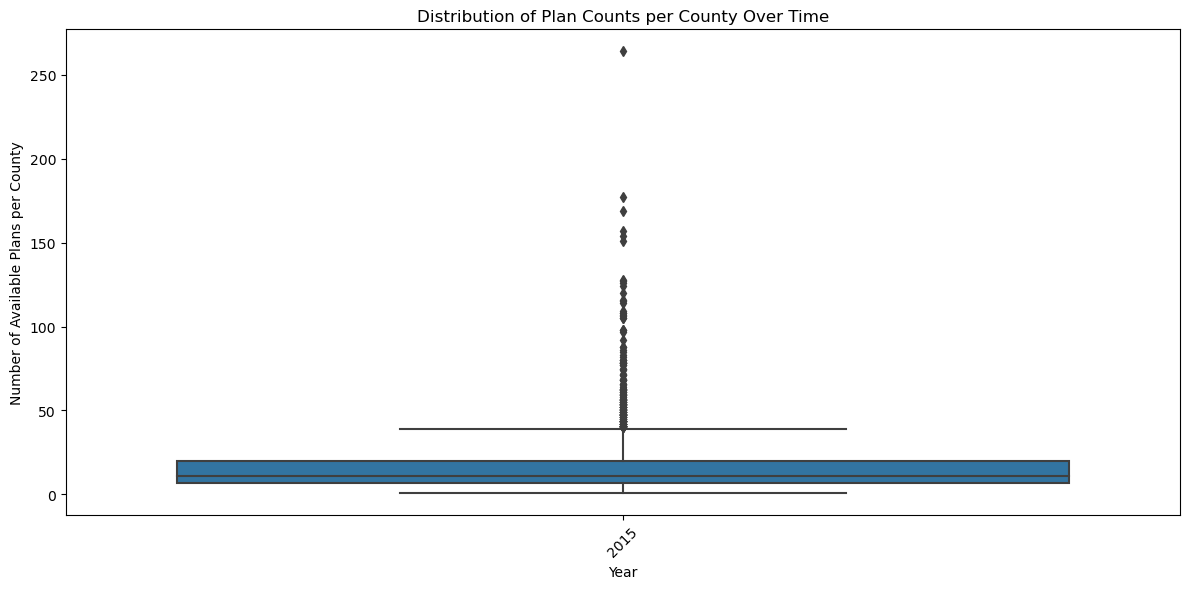

In [6]:
# Group by county and year to count plans
county_plan_counts = (
    cleaned.groupby(["state", "county", "year"])
    .size()
    .reset_index(name="plan_count")
)

# Box and whisker plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=county_plan_counts, x="year", y="plan_count")

plt.title("Distribution of Plan Counts per County Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Available Plans per County")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
print(cleaned["year"].value_counts().sort_index())

2015    49408
Name: year, dtype: int64
